<a href="https://colab.research.google.com/github/Mukolwe29/KCB-Data-science-and-AI/blob/master/rcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("rugarch")
install.packages("lmtest")
install.packages("forecast")
install.packages("fGarch")
install.packages("urca")




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘xts’, ‘zoo’, ‘chron’, ‘SkewHyperbolic’, ‘Rcpp’, ‘nloptr’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘timeDate’, ‘tseries’, ‘urca’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘gss’, ‘stabledist’, ‘gbutils’, ‘Rdpack’, ‘fBasics’, ‘timeSeries’, ‘fastICA’, ‘cvar’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rugarch)
library(lmtest)
library(forecast)
library(fGarch)
library(urca)


Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")



In [ ]:
data<-read.csv("C:\Users\ADMIN\Downloads\COILWTICO.csv")
tail(data)


In [ ]:
ts_data<-ts(data[,2], start = c(2004,1), end = c(2024,1), frequency = 12)


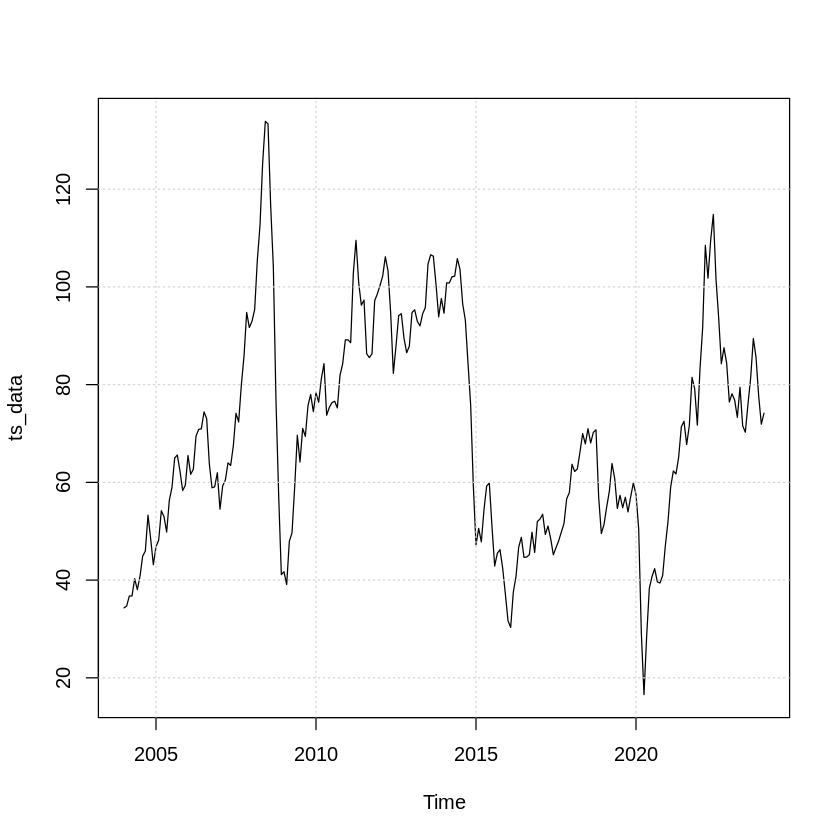

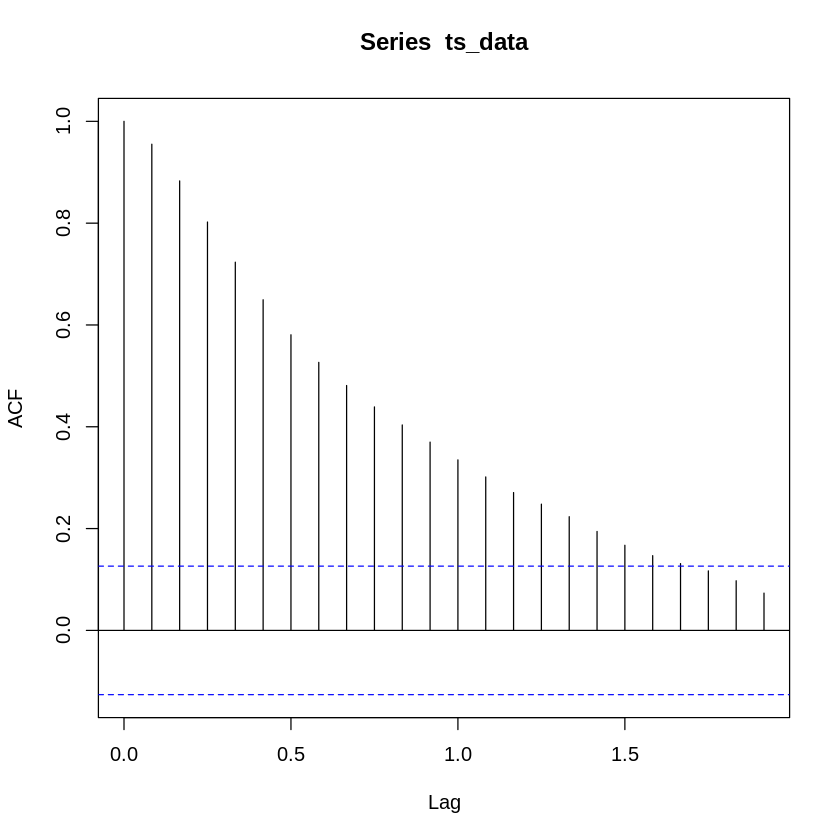

In [ ]:
plot(ts_data)
grid()
acf(ts_data)


In [ ]:
summary(ur.df(ts_data, type = "drift", selectlags = "AIC"))



In [ ]:
dl_data<-diff(log(ts_data))

In [ ]:
summary(ur.df(dl_data, type = "drift", selectlags = "AIC"))


In [ ]:
plot(dl_data, ylab="", xlab="")
grid()


In [ ]:
par(mfrow = c(1, 2))
acf(dl_data)
pacf(dl_data)



In [ ]:
par(mfrow = c(1, 1))
ar1<-arima(dl_data, c(1,0,0))
ar1


In [ ]:
summary(ar1)
res1 <- residuals(ar1)
pacf(res1)
coeftest(ar1)



In [ ]:
ar2<-arima(dl_data, c(2,0,0))
ar2
summary(ar1)
res2 <- residuals(ar2)
pacf(res2)
coeftest(ar2)



















vol_tgarch11 <- ts(tGarchModel11@fit$sigma^2,end = c(2024,1), frequency = 12)
plot(vol_tgarch11, xlab="", ylab="")

acf(residuals(tGarchModel11, standardize = TRUE))
acf(residuals(tGarchModel11, standardize = TRUE)^2)

forec <- ugarchforecast(tGarchModel11, data = dl_data, n.ahead = 12)
forec
plot(forec, which=1)


In [ ]:
ma1<-arima(dl_data, c(0,0,1))
ma1
summary(ma1)
res3 <- residuals(ma1)
pacf(res3)
coeftest(ma1)

In [ ]:
ar1$aic
ar2$aic
ma1$aic

In [ ]:
forecast <- forecast(ar1, h=12)
plot(forecast)
grid()
forecast


In [ ]:
ar1_su_log <- arima(log(ts_data), c(1,0,0))
forecast <- forecast(ar1_su_log, h=12)
plot(forecast)
grid()

In [ ]:
checkresiduals(ar1)
checkresiduals(ar1_su_log)

In [ ]:
# GARCH(1,0)
spec.garch10 <- ugarchspec(variance.model = list(model = "sGARCH",
                                                 garchOrder = c(1,0)),
                           mean.model = list(armaOrder=c(1,0)))
garchModel10 <- ugarchfit(spec.garch10, data=dl_data)
garchModel10


In [ ]:
vol_garch10 <- ts(garchModel10@fit$sigma^2,end = c(2024,1), frequency = 12)
plot(vol_garch10, xlab="", ylab="")
grid()


In [ ]:
# GARCH(1,1)
spec.garch11 <- ugarchspec(variance.model = list(model = "sGARCH",
                                                 garchOrder = c(1,1)),
                           mean.model = list(armaOrder=c(1,0)))
garchModel11 <- ugarchfit(spec.garch11, data=dl_data)
garchModel11

vol_garch11 <- ts(garchModel11@fit$sigma^2,end = c(2024,1), frequency = 12)
plot(vol_garch11, xlab="", ylab="")

In [ ]:
# EGARCH(1,1)
spec.egarch11 <- ugarchspec(variance.model = list(model = "eGARCH",
                                                  garchOrder = c(1,1)),
                            mean.model = list(armaOrder=c(1,0)))
eGarchModel11 <- ugarchfit(spec.egarch11, data=dl_data)
eGarchModel11

vol_egarch11 <- ts(eGarchModel11@fit$sigma^2,end = c(2024,1), frequency = 12)
plot(vol_egarch11, xlab="", ylab="")

In [ ]:
# TGARCH(1,0)
spec.tgarch10 <- ugarchspec(
  variance.model = list(model = "fGARCH",
                        submodel = "TGARCH",
                        garchOrder = c(1,0)
  ),
  mean.model = list(armaOrder=c(1,0))
)

tGarchModel10 <- ugarchfit(spec.tgarch10, data=dl_data)
tGarchModel10

vol_tgarch10 <- ts(tGarchModel10@fit$sigma^2,end = c(2024,1), frequency = 12)
plot(vol_tgarch10, xlab="", ylab="")

In [ ]:
# TGARCH(1,1)
spec.tgarch11 <- ugarchspec(
  variance.model = list(model = "fGARCH",
                        submodel = "TGARCH",
                        garchOrder = c(1,1)
  ),
  mean.model = list(armaOrder=c(1,0))
)

tGarchModel11 <- ugarchfit(spec.tgarch11, data=dl_data)
tGarchModel11
